## Data Preprocessing and Feature Engineering


### steps in Data preprocessing and EDA

Data Preprocessing Steps

1. Data Collection
2. Data Cleaning
   - Handling Missing Values
   - Removing Duplicates
   - Handling Outliers
   - Data Type Conversion
3. Data Transformation
   - Normalization/Standardization
   - Encoding Categorical Variables
   - Feature Engineering
4. Handling Imbalanced Data
5. Feature Selection/Reduction
   - Removing Unnecessary Features
   - Dimensionality Reduction
6. Data Splitting

 Exploratory Data Analysis (EDA) Steps

1. Understand the Data
2. Univariate Analysis
   - Summary Statistics
   - Visualizations
3. Bivariate Analysis
   - Relationships Between Variables
   - Correlation Analysis
4. Multivariate Analysis
   - Interaction Effects
   - Dimensionality Reduction Visualization
5. Outlier Analysis
6. Distribution Analysis
   - Normality Checks
   - Skewness and Kurtosis
7. Feature Importance
8. Insights and Hypothesis Generation

In [602]:
import  pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import prophet

In [603]:
sales_df =pd.read_excel(r"Data/Pizza_Sale.xlsx",engine='openpyxl',parse_dates=False)
sales_df['order_date']


0        2015-01-01 00:00:00
1        2015-01-01 00:00:00
2        2015-01-01 00:00:00
3        2015-01-01 00:00:00
4        2015-01-01 00:00:00
                ...         
48615             31-12-2015
48616             31-12-2015
48617             31-12-2015
48618             31-12-2015
48619             31-12-2015
Name: order_date, Length: 48620, dtype: object

In [604]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'], errors='coerce', dayfirst=False)

# Format the date in '12 Jan 2025' format
sales_df['formatted_date'] = sales_df['order_date'].dt.strftime('%d %b %Y')
sales_df.sort_values(by=['order_date'],inplace=True)
#sales_df.to_excel("val.xlsx")


In [605]:
#categorical columns
def explore_data(sales_df):
    print(f"Rows : {sales_df.shape[0]} , Columns : {sales_df.shape[1]} ")
    cat = [col for col in sales_df.columns if sales_df[col].dtype == 'O']
    print(f"Count of Categorical columns : {len(cat)}\n------------------")
    for col in cat:
        print(col)
    numerical_columns =[col for col in sales_df.columns if sales_df[col].dtype != 'O']
    print(f"Count of Numerical columns : {len(numerical_columns)}\n------------------")
    for col in numerical_columns:
        print(col)

In [606]:
explore_data(sales_df)

Rows : 48620 , Columns : 13 
Count of Categorical columns : 7
------------------
pizza_name_id
order_time
pizza_size
pizza_category
pizza_ingredients
pizza_name
formatted_date
Count of Numerical columns : 6
------------------
pizza_id
order_id
quantity
order_date
unit_price
total_price


In [607]:
sales_df['order_date']

0       2015-01-01
103     2015-01-01
104     2015-01-01
105     2015-01-01
106     2015-01-01
           ...    
48506   2015-12-31
48507   2015-12-31
48508   2015-12-31
48500   2015-12-31
48619   2015-12-31
Name: order_date, Length: 48620, dtype: datetime64[ns]

In [608]:
#Numerical columns
numerical_columns =[col for col in sales_df.columns if sales_df[col].dtype != 'O']
print(f"Count of Numerical columns : {len(numerical_columns)}")
numerical_columns

Count of Numerical columns : 6


['pizza_id', 'order_id', 'quantity', 'order_date', 'unit_price', 'total_price']

### 2. Data Cleaning

#### 2.a)Identifying & Handling Missing Values 

In [609]:
# Identifying and Handling Missing Values
def data_cleaning(sales_df):
    missing_values=sales_df.isnull().sum() / len(sales_df) * 100
    print(f"Before Imputing Missing value % \n --------------- \n{missing_values}")
    to_be_impute = missing_values[missing_values > 0 ].index.tolist()
    print(to_be_impute)
    sales_df.set_index('order_date',inplace=True)
    sales_df[['total_price']]=sales_df[['total_price']].interpolate("time")
    print(f"After time based imputing \n -------------\n{sales_df.isnull().sum() / len(sales_df) * 100}")
    sales_df.reset_index(inplace=True)

In [610]:
data_cleaning(sales_df)

Before Imputing Missing value % 
 --------------- 
pizza_id             0.000000
order_id             0.000000
pizza_name_id        0.032908
quantity             0.000000
order_date           0.000000
order_time           0.000000
unit_price           0.000000
total_price          0.014397
pizza_size           0.000000
pizza_category       0.047306
pizza_ingredients    0.026738
pizza_name           0.014397
formatted_date       0.000000
dtype: float64
['pizza_name_id', 'total_price', 'pizza_category', 'pizza_ingredients', 'pizza_name']
After time based imputing 
 -------------
pizza_id             0.000000
order_id             0.000000
pizza_name_id        0.032908
quantity             0.000000
order_time           0.000000
unit_price           0.000000
total_price          0.000000
pizza_size           0.000000
pizza_category       0.047306
pizza_ingredients    0.026738
pizza_name           0.014397
formatted_date       0.000000
dtype: float64


In [611]:
unique_ingredients = sales_df.groupby('pizza_name_id')['pizza_ingredients'].unique()
grouped_unique_as_list = unique_ingredients.apply(lambda x: str(x))
grouped_unique_as_list  # Fl
sales_df['pizza_ingredients'] = sales_df.apply(lambda row : grouped_unique_as_list[row['pizza_name_id']] if pd.isnull(row['pizza_ingredients']) else row['pizza_ingredients'],axis=1)
sales_df['pizza_ingredients'].isnull().sum()




np.int64(0)

In [612]:
sales_df

,order_date,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,formatted_date
0,2015-01-01,1,1,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza,01 Jan 2015
1,2015-01-01,104,42,peppr_salami_m,1,17:28:09,16.50,16.50,M,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza,01 Jan 2015
2,2015-01-01,105,43,ckn_alfredo_m,1,17:38:34,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza,01 Jan 2015
3,2015-01-01,106,43,ital_supr_m,1,17:38:34,16.50,16.50,M,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza,01 Jan 2015
4,2015-01-01,107,43,peppr_salami_l,1,17:38:34,20.75,20.75,L,Supreme,"Genoa Salami, Capocollo, Pepperoni, Tomatoes, ...",The Pepper Salami Pizza,01 Jan 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,48507,21300,spicy_ital_l,1,15:52:48,20.75,20.75,L,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ...",The Spicy Italian Pizza,31 Dec 2015
48616,2015-12-31,48508,21301,calabrese_l,1,16:01:07,20.25,20.25,L,Supreme,"?duja Salami, Pancetta, Tomatoes, Red Onions, ...",The Calabrese Pizza,31 Dec 2015
48617,2015-12-31,48509,21301,classic_dlx_m,1,16:01:07,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza,31 Dec 2015
48618,2015-12-31,48501,21299,mediterraneo_s,1,15:52:16,12.00,12.00,S,Veggie,"Spinach, Artichokes, Kalamata Olives, Sun-drie...",The Mediterranean Pizza,31 Dec 2015


In [613]:
sales_df[sales_df['pizza_name_id']=='pepperoni_s']

,order_date,pizza_id,order_id,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name,formatted_date
137,2015-01-01,78,31,pepperoni_s,1,15:50:18,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,01 Jan 2015
177,2015-01-02,4292,1904,pepperoni_s,1,18:13:17,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,02 Jan 2015
187,2015-01-02,4254,1887,pepperoni_s,1,16:48:06,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,02 Jan 2015
213,2015-01-02,4329,1925,pepperoni_s,1,20:43:56,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,02 Jan 2015
215,2015-01-02,4331,1926,pepperoni_s,1,21:12:29,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,02 Jan 2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48321,2015-12-29,48375,21244,pepperoni_s,1,22:10:05,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,29 Dec 2015
48327,2015-12-29,48369,21242,pepperoni_s,1,19:54:11,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,29 Dec 2015
48484,2015-12-31,48551,21318,pepperoni_s,1,18:07:03,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,31 Dec 2015
48547,2015-12-31,48483,21293,pepperoni_s,1,14:40:24,9.75,9.75,S,Classic,"Mozzarella Cheese, Pepperoni",The Pepperoni Pizza,31 Dec 2015


In [614]:
ingredients=sales_df.groupby('pizza_name_id')['pizza_name'].unique()
grouped_unique_as_list = ingredients.apply(lambda x: str(x))


In [615]:
sales_df['pizza_name'] = sales_df.apply(lambda row : grouped_unique_as_list[row['pizza_name_id']] if pd.isnull(row['pizza_name']) else row['pizza_name'],axis=1)

In [616]:
sales_df['pizza_name'].isnull().sum()

np.int64(0)

In [617]:
sales_df['pizza_category'].isnull().sum()

np.int64(23)

In [618]:
cat = pd.DataFrame(sales_df.groupby('pizza_category')['pizza_name_id'].unique())
cat.reset_index(inplace=True)
dic = cat.to_dict()
dic

{'pizza_category': {0: 'Chicken', 1: 'Classic', 2: 'Supreme', 3: 'Veggie'},
 'pizza_name_id': {0: array(['ckn_alfredo_m', 'thai_ckn_m', 'southw_ckn_l', 'ckn_pesto_m',
         'ckn_pesto_l', 'thai_ckn_l', 'bbq_ckn_m', 'southw_ckn_s',
         'bbq_ckn_l', 'southw_ckn_m', 'cali_ckn_l', 'cali_ckn_m',
         'cali_ckn_s', 'bbq_ckn_s', nan, 'ckn_alfredo_s', 'ckn_alfredo_l',
         'thai_ckn_s', 'ckn_pesto_s'], dtype=object),
  1: array(['hawaiian_m', 'hawaiian_s', 'classic_dlx_l', 'the_greek_s',
         'pep_msh_pep_l', 'pepperoni_m', 'big_meat_s', 'classic_dlx_m',
         'ital_cpcllo_l', 'the_greek_xl', 'pep_msh_pep_m', 'pep_msh_pep_s',
         'ital_cpcllo_m', 'pepperoni_l', 'hawaiian_l', 'classic_dlx_s', nan,
         'pepperoni_s', 'napolitana_l', 'ital_cpcllo_s', 'napolitana_s',
         'the_greek_l', 'napolitana_m', 'the_greek_m', 'the_greek_xxl'],
        dtype=object),
  2: array(['peppr_salami_m', 'ital_supr_m', 'peppr_salami_l', 'prsc_argla_l',
         'spicy_ital_l', '

In [619]:
import numpy as np
sales_df[['pizza_category','pizza_name']]

,pizza_category,pizza_name
0,Classic,The Hawaiian Pizza
1,Supreme,The Pepper Salami Pizza
2,Chicken,The Chicken Alfredo Pizza
3,Supreme,The Italian Supreme Pizza
4,Supreme,The Pepper Salami Pizza
...,...,...
48615,Supreme,The Spicy Italian Pizza
48616,Supreme,The Calabrese Pizza
48617,Classic,The Classic Deluxe Pizza
48618,Veggie,The Mediterranean Pizza


In [620]:
#Grouped Imputation with mode for categorical Data

# Group by 'pizza_ingredients' and impute missing 'pizza_category' using the mode of each group
sales_df['pizza_category'] = sales_df.groupby('pizza_ingredients')['pizza_category'].transform(
    lambda group: group.fillna(group.mode()[0] if not group.mode().empty else 'Unknown')
)


In [621]:
sales_df['pizza_name_id'] = sales_df.groupby('pizza_category')['pizza_name_id'].transform(
    lambda group: group.fillna(group.mode()[0] if not group.mode().empty else 'Unknown')
)


In [622]:
sales_df['pizza_category'].isnull().sum()

np.int64(0)

In [623]:
sales_df['pizza_name_id'].isnull().sum()

np.int64(0)

In [624]:
missing_values=sales_df.isnull().sum() / len(sales_df) * 100
missing_values

order_date           0.0
pizza_id             0.0
order_id             0.0
pizza_name_id        0.0
quantity             0.0
order_time           0.0
unit_price           0.0
total_price          0.0
pizza_size           0.0
pizza_category       0.0
pizza_ingredients    0.0
pizza_name           0.0
formatted_date       0.0
dtype: float64

### 3 . Transformation

#### 3.a)Feature Engineering

In [625]:
sales_df.dtypes

order_date           datetime64[ns]
pizza_id                      int64
order_id                      int64
pizza_name_id                object
quantity                      int64
order_time                   object
unit_price                  float64
total_price                 float64
pizza_size                   object
pizza_category               object
pizza_ingredients            object
pizza_name                   object
formatted_date               object
dtype: object

In [626]:
sales_df['order_day'] = sales_df['order_date'].dt.day_name()
sales_df['order_month'] = sales_df['order_date'].dt.month_name()
sales_df['order_year'] = sales_df['order_date'].dt.year

sales_df['order_hour']=sales_df['order_time'].apply(lambda x: x.hour)
sales_df['order_minute']=sales_df['order_time'].apply(lambda x: x.minute)
sales_df[['order_day','order_month','order_year','order_hour','order_minute']]


,order_day,order_month,order_year,order_hour,order_minute
0,Thursday,January,2015,11,38
1,Thursday,January,2015,17,28
2,Thursday,January,2015,17,38
3,Thursday,January,2015,17,38
4,Thursday,January,2015,17,38
...,...,...,...,...,...
48615,Thursday,December,2015,15,52
48616,Thursday,December,2015,16,1
48617,Thursday,December,2015,16,1
48618,Thursday,December,2015,15,52


In [627]:
columns_to_be_removed = ['order_id','pizza_id','pizza_ingredients','pizza_name']
sales_df.drop(columns =columns_to_be_removed,inplace=True,axis=1)
sales_df

,order_date,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,formatted_date,order_day,order_month,order_year,order_hour,order_minute
0,2015-01-01,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,01 Jan 2015,Thursday,January,2015,11,38
1,2015-01-01,peppr_salami_m,1,17:28:09,16.50,16.50,M,Supreme,01 Jan 2015,Thursday,January,2015,17,28
2,2015-01-01,ckn_alfredo_m,1,17:38:34,16.75,16.75,M,Chicken,01 Jan 2015,Thursday,January,2015,17,38
3,2015-01-01,ital_supr_m,1,17:38:34,16.50,16.50,M,Supreme,01 Jan 2015,Thursday,January,2015,17,38
4,2015-01-01,peppr_salami_l,1,17:38:34,20.75,20.75,L,Supreme,01 Jan 2015,Thursday,January,2015,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,spicy_ital_l,1,15:52:48,20.75,20.75,L,Supreme,31 Dec 2015,Thursday,December,2015,15,52
48616,2015-12-31,calabrese_l,1,16:01:07,20.25,20.25,L,Supreme,31 Dec 2015,Thursday,December,2015,16,1
48617,2015-12-31,classic_dlx_m,1,16:01:07,16.00,16.00,M,Classic,31 Dec 2015,Thursday,December,2015,16,1
48618,2015-12-31,mediterraneo_s,1,15:52:16,12.00,12.00,S,Veggie,31 Dec 2015,Thursday,December,2015,15,52


In [628]:
sales_df.to_excel("for_Eda.xlsx")

#### 3.b) Encoding

In [629]:
sales_df

,order_date,pizza_name_id,quantity,order_time,unit_price,total_price,pizza_size,pizza_category,formatted_date,order_day,order_month,order_year,order_hour,order_minute
0,2015-01-01,hawaiian_m,1,11:38:36,13.25,13.25,M,Classic,01 Jan 2015,Thursday,January,2015,11,38
1,2015-01-01,peppr_salami_m,1,17:28:09,16.50,16.50,M,Supreme,01 Jan 2015,Thursday,January,2015,17,28
2,2015-01-01,ckn_alfredo_m,1,17:38:34,16.75,16.75,M,Chicken,01 Jan 2015,Thursday,January,2015,17,38
3,2015-01-01,ital_supr_m,1,17:38:34,16.50,16.50,M,Supreme,01 Jan 2015,Thursday,January,2015,17,38
4,2015-01-01,peppr_salami_l,1,17:38:34,20.75,20.75,L,Supreme,01 Jan 2015,Thursday,January,2015,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,spicy_ital_l,1,15:52:48,20.75,20.75,L,Supreme,31 Dec 2015,Thursday,December,2015,15,52
48616,2015-12-31,calabrese_l,1,16:01:07,20.25,20.25,L,Supreme,31 Dec 2015,Thursday,December,2015,16,1
48617,2015-12-31,classic_dlx_m,1,16:01:07,16.00,16.00,M,Classic,31 Dec 2015,Thursday,December,2015,16,1
48618,2015-12-31,mediterraneo_s,1,15:52:16,12.00,12.00,S,Veggie,31 Dec 2015,Thursday,December,2015,15,52


In [630]:
df = pd.DataFrame(sales_df[['order_date','formatted_date','pizza_name_id','quantity','unit_price','order_day','order_month',"order_year",'order_hour']])
df

,order_date,formatted_date,pizza_name_id,quantity,unit_price,order_day,order_month,order_year,order_hour
0,2015-01-01,01 Jan 2015,hawaiian_m,1,13.25,Thursday,January,2015,11
1,2015-01-01,01 Jan 2015,peppr_salami_m,1,16.50,Thursday,January,2015,17
2,2015-01-01,01 Jan 2015,ckn_alfredo_m,1,16.75,Thursday,January,2015,17
3,2015-01-01,01 Jan 2015,ital_supr_m,1,16.50,Thursday,January,2015,17
4,2015-01-01,01 Jan 2015,peppr_salami_l,1,20.75,Thursday,January,2015,17
...,...,...,...,...,...,...,...,...,...
48615,2015-12-31,31 Dec 2015,spicy_ital_l,1,20.75,Thursday,December,2015,15
48616,2015-12-31,31 Dec 2015,calabrese_l,1,20.25,Thursday,December,2015,16
48617,2015-12-31,31 Dec 2015,classic_dlx_m,1,16.00,Thursday,December,2015,16
48618,2015-12-31,31 Dec 2015,mediterraneo_s,1,12.00,Thursday,December,2015,15


In [631]:

df['order_date']=df['order_date'].dt.date

In [632]:
df.to_excel("dataset.xlsx",index=False)

1
hawaiian_m


c:\Doughmate\my-env\Lib\site-packages\matplotlib\axis.py:1813: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  ret = self.converter.convert(x, self.units, self)


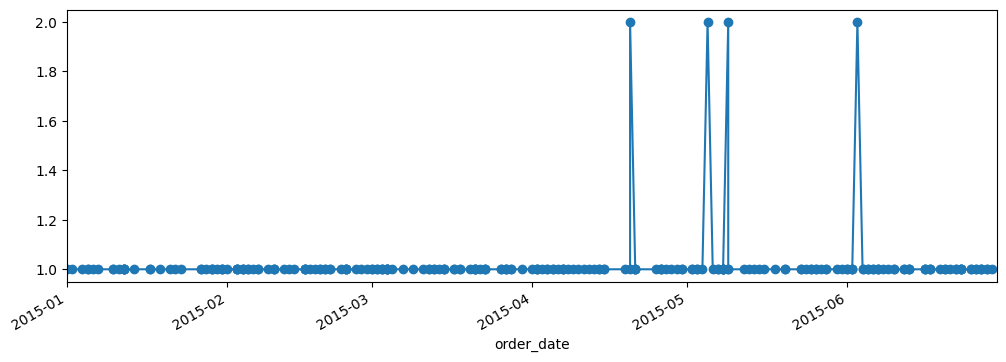

In [633]:
unique_pizza_names = df['pizza_name_id'].unique()[:1]
print(len(unique_pizza_names))


for pizza in unique_pizza_names:
    pizza_df = pd.DataFrame(sales_df[sales_df['pizza_name_id'] == pizza]).set_index("order_date")
    print(pizza)
    plt.figure(figsize=(12, 4))
  
    pizza_df['quantity'].plot(kind='line', marker='o', ax=plt.gca(),xlim=['1/1/2015','30/6/2015'])
